In [26]:
import pandas as pd
import numpy as np
import itertools

from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import confusion_matrix, classification_report


In [27]:
def calculate_features(face_file):
    df = pd.read_csv(face_file)
    result = []

    # Sol göz yüksekliği
    df["left_eye"] = ((df["y38"] + df["y39"]) / 2) - ((df["y42"] + df["y41"]) / 2)
    result.append(df["left_eye"].std())

    # Sağ göz yüksekliği
    df["right_eye"] = ((df["y44"] + df["y45"]) / 2) - ((df["y48"] + df["y47"]) / 2)
    result.append(df["right_eye"].std())

    # Kaş arası mesafesi
    df["between_eyebrow"] = df["x23"] - df["x22"]
    result.append(df["between_eyebrow"].std())

    # Sağ kaş yüksekliği
    df["right_eyebrow"] = df[["y18", "y19", "y20", "y21", "y22"]].mean(axis=1)
    result.append(df["right_eyebrow"].std())

    # Sol kaş yüksekliği
    df["left_eyebrow"] = df[["y23", "y24", "y25", "y26", "y27"]].mean(axis=1)
    result.append(df["left_eyebrow"].std())

    # Dudak yüksekliği
    df["lips"] = df["y63"] - df["y67"]
    result.append(df["lips"].std())

    # Burun genişliği
    df["nose"] = df["x36"] - df["x32"]
    result.append(df["nose"].std())

    # Ağız açıklığı
    df["mouth_open"] = df["y66"] - df["y62"]
    result.append(df["mouth_open"].std())


    return result

In [28]:
df = pd.read_csv('/Users/canavar/Documents/datasets/BagOfLies/Annotations.csv')

path = "/Users/canavar/Documents/datasets/BagOfLies/Finalised/"
result = []
for index, row in df.iterrows():
    run_id = row['run']
    user_id = row['usernum']
    face_file_path = f"{path}User_{user_id}/run_{run_id}/face.csv"
    features = calculate_features(face_file_path)
    result+=[features]

In [29]:
scaler = MinMaxScaler()
scaler.fit(result)
result = scaler.transform(result)

In [30]:
y = df['truth'].eq(0).mul(1).to_numpy()

In [31]:
X =  np.array(result)

In [32]:
smote = SMOTE(random_state=42)

Random Forest - Best Parameters: {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 10}
Random Forest - Best Score: 0.5576923076923077
SVM - Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
SVM - Best Score: 0.5807692307692307
Gradient Boosting - Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.8}
Gradient Boosting - Best Score: 0.5538461538461539
Random Forest - Accuracy: 0.5846153846153846
SVM - Accuracy: 0.6153846153846154
Gradient Boosting - Accuracy: 0.5538461538461539
Random Forest - Precision: 0.6189839146360885
Random Forest - Recall: 0.5846153846153846
Random Forest - F1 Score: 0.5768808417650624
SVM - Precision: 0.6536868928173276
SVM - Recall: 0.6153846153846154
SVM - F1 Score: 0.6082230016343171
Gradient Boosting - Precision: 0.5717948717948719
Gradient Boosting - Recall: 0.5538461538461539
Gradient Boosting - F1 Score: 0.5519435788092505
Random Forest

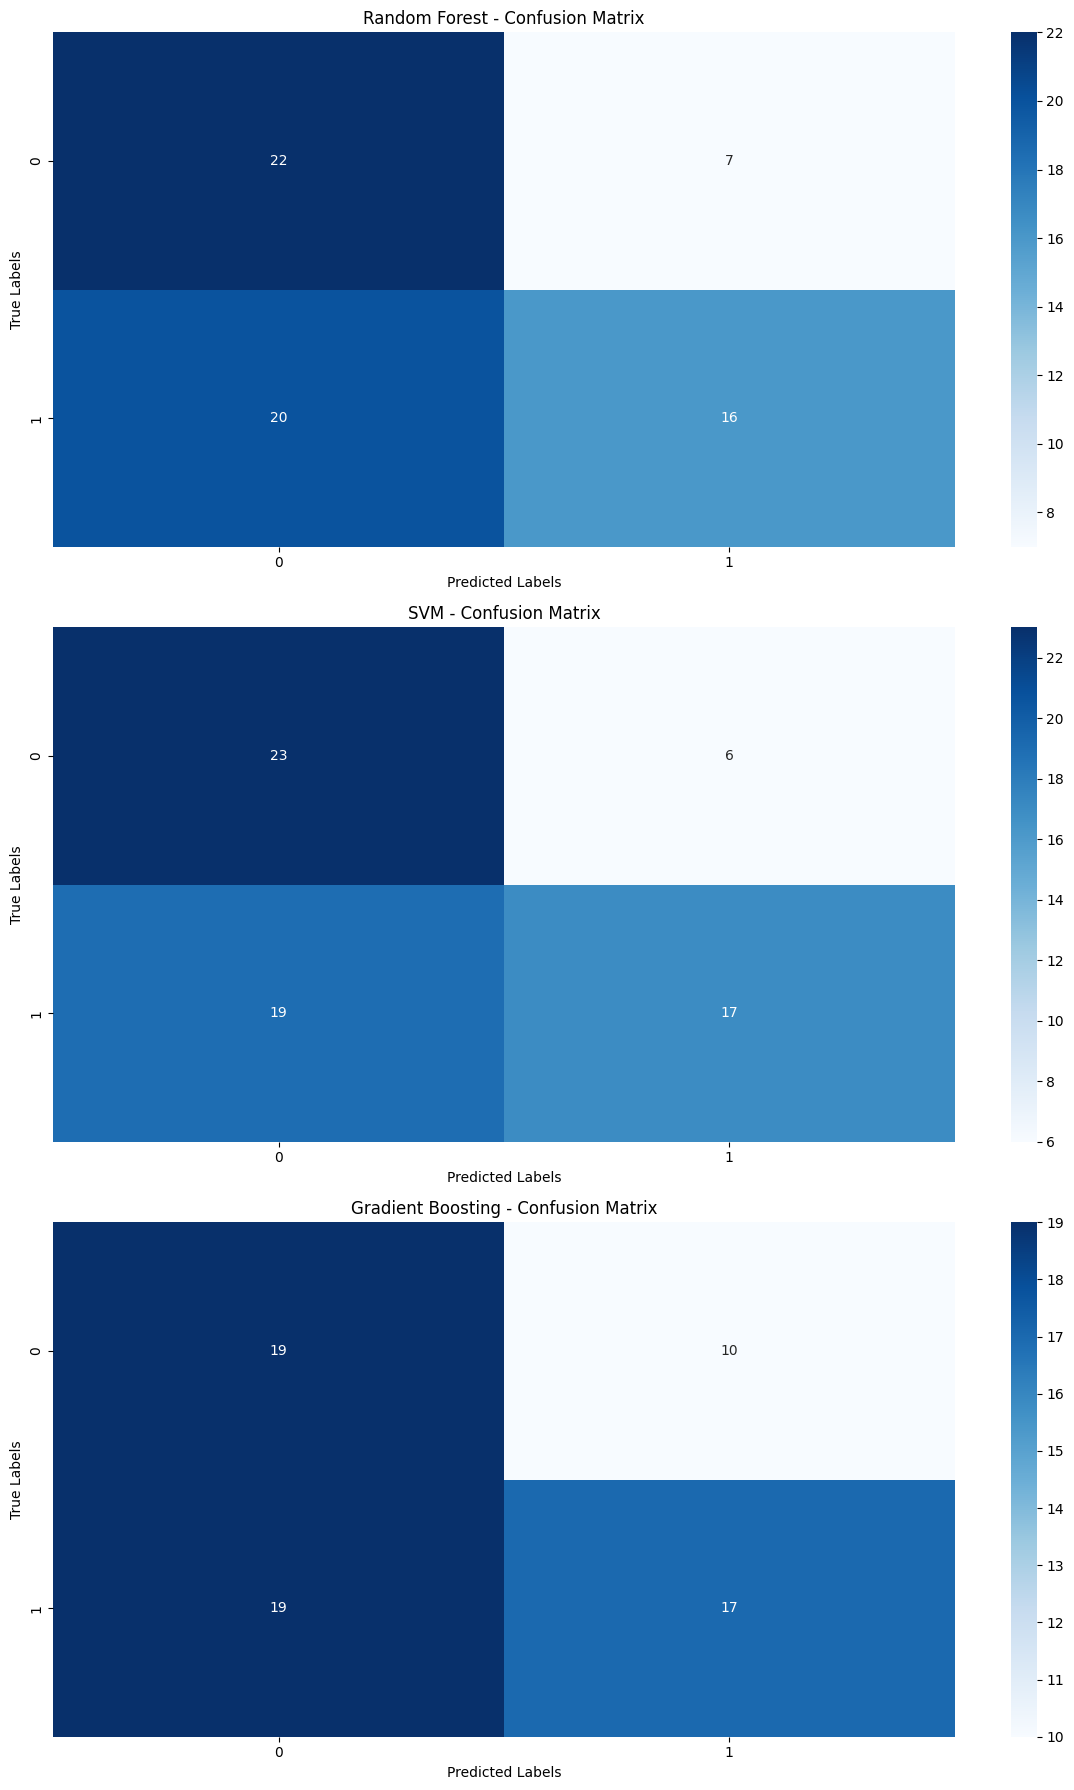

In [34]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train test split (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [10],  # Number of trees in the forest
    'max_depth': [3],  # Maximum depth of the tree
    'max_features': ['sqrt'],  # Number of features to consider at every split
    'min_samples_split': [20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True]  # Method of selecting samples for training each tree
}

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [1, 0.1, 0.01],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

# Define the parameter grid for Gradient Boosting
param_grid_gbm = {
    'n_estimators': [10],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4],  # Maximum depth of the individual trees
    'subsample': [0.8, 1.0]  # Fraction of samples used for fitting the individual base learners
}

# Create classifiers
rf = RandomForestClassifier()
svm = SVC()
gbm = GradientBoostingClassifier()

# Instantiate GridSearchCV for each classifier
grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search_svm = GridSearchCV(svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search_gbm = GridSearchCV(gbm, param_grid=param_grid_gbm, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)

# Fit the GridSearchCV objects to the training data
grid_search_rf.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)
grid_search_gbm.fit(X_train, y_train)

# Get the best parameters and best score for each classifier
print("Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("Random Forest - Best Score:", grid_search_rf.best_score_)

print("SVM - Best Parameters:", grid_search_svm.best_params_)
print("SVM - Best Score:", grid_search_svm.best_score_)

print("Gradient Boosting - Best Parameters:", grid_search_gbm.best_params_)
print("Gradient Boosting - Best Score:", grid_search_gbm.best_score_)

# Predict on the test set using the best models
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)
y_pred_gbm = grid_search_gbm.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Random Forest - Accuracy:", accuracy_rf)
print("SVM - Accuracy:", accuracy_svm)
print("Gradient Boosting - Accuracy:", accuracy_gbm)

# Calculate precision, recall, and f1-score
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)

print("SVM - Precision:", precision_svm)
print("SVM - Recall:", recall_svm)
print("SVM - F1 Score:", f1_svm)

print("Gradient Boosting - Precision:", precision_gbm)
print("Gradient Boosting - Recall:", recall_gbm)
print("Gradient Boosting - F1 Score:", f1_gbm)

# Print classification report for each classifier
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("SVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Gradient Boosting - Classification Report:")
print(classification_report(y_test, y_pred_gbm))

# Get the cross-validation results for each classifier
cv_results_rf = grid_search_rf.cv_results_
cv_results_svm = grid_search_svm.cv_results_
cv_results_gbm = grid_search_gbm.cv_results_

# Plotting the confusion matrices
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot confusion matrix for Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')
axs[0].set_title('Random Forest - Confusion Matrix')

# Plot confusion matrix for SVM
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', ax=axs[1])
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')
axs[1].set_title('SVM - Confusion Matrix')

# Plot confusion matrix for Gradient Boosting
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues', ax=axs[2])
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')
axs[2].set_title('Gradient Boosting - Confusion Matrix')

plt.tight_layout()
plt.show()


In [35]:
X_train = X_train.astype(float)
y_train = y_train.astype(int)

In [36]:
param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [37]:
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_distributions, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("En iyi parametreler:", random_search.best_params_)
print("En iyi skor:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=600; to

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
205 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

En iyi parametreler: {'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': True}
En iyi skor: 0.5769230769230769


In [38]:
train_predictions = random_search.predict(X_train)
test_predictions = random_search.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
train_classification_report = classification_report(y_train, train_predictions)

test_accuracy = accuracy_score(y_test, test_predictions)
test_classification_report = classification_report(y_test, test_predictions)

print("Eğitim seti doğruluğu:", train_accuracy)
print("Eğitim seti sınıflandırma raporu:")
print(train_classification_report)

print("\nTest seti doğruluğu:", test_accuracy)
print("Test seti sınıflandırma raporu:")
print(test_classification_report)

Eğitim seti doğruluğu: 0.9346153846153846
Eğitim seti sınıflandırma raporu:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       134
           1       0.94      0.93      0.93       126

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260


Test seti doğruluğu: 0.6461538461538462
Test seti sınıflandırma raporu:
              precision    recall  f1-score   support

           0       0.59      0.66      0.62        29
           1       0.70      0.64      0.67        36

    accuracy                           0.65        65
   macro avg       0.65      0.65      0.64        65
weighted avg       0.65      0.65      0.65        65

